In [49]:
from matplotlib import pyplot as plt
import pandas as pd

stonks = []
stonkNames = []

import glob
for file in glob.glob("*.csv"):
    stonkNames.append(file[0:-4])
    stonks.append(pd.read_csv(file)["Open"])

testStonk = stonks[0]

testStonk

0      57.828
1      56.268
2      56.898
3      57.528
4      57.637
5      56.808
6      48.598
7      52.187
8      53.467
9      56.608
10     58.288
11     67.388
12     63.538
13     68.528
14     70.877
15     74.737
16     77.628
17     76.108
18     84.610
19     94.797
20     96.257
21     88.418
22     84.757
23     85.317
24     88.118
25     85.068
26     77.847
27     62.987
28     74.888
29     77.498
30     73.828
31     76.487
32     84.697
33     86.698
34     87.507
35     98.698
36    107.487
37     96.998
38    108.595
39    109.718
40    114.857
41    114.226
42    111.937
Name: Open, dtype: float64

In [96]:
T = 12   # number of months
S = 31    # month to start at, inclusive

stonkRankings = [];

for stonk in stonks:
    R = (stonk / stonk.shift(1)) - 1
    print(R.size - (S+T))
    print(R.size - S)
    R = R[R.size - (S+T):R.size - S]
    R = R.reset_index(drop=True)
    rMean = R.sum() / T
    sigma = R.std()
    rRiskAdj = rMean / sigma

    stonkRankings.append(rRiskAdj)

0
12
0
12
0
12


In [65]:
for i in range(len(stonks)):
    print(stonkNames[i] + " " + str(stonkRankings[i]))

sbux 0.1414002440178735
twtr 0.15574331583403148
wmt -0.0768627561682624


In [98]:
for i in range(len(stonks)):
    print(stonkNames[i] + " " + str(stonks[i].iloc[T] / stonks[i][T-1]))

sbux 0.9428681664391285
twtr 0.8706987413974827
wmt 0.934666420936233


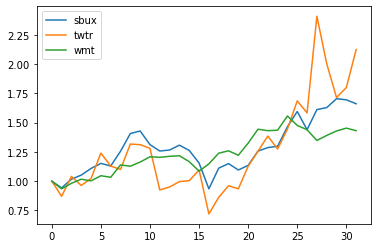

In [97]:
for i in range(len(stonks)):
    plt.plot(stonks[i][T-1:S+T].reset_index(drop=True) / stonks[i][T-1])
plt.legend(stonkNames)